In [1]:
import pandas as pd

# Load the data
data = pd.read_csv('/Users/cicisofia/Downloads/cf_as_function_of_x.dat')

# Step 1: Remove rows containing metadata (e.g., rows containing '#')
data_cleaned = data[~data['variables="x"'].str.contains('#', na=False)]

# Step 2: Inspect the first few rows after removing metadata
print(data_cleaned.head(10))

# Step 3: Filter rows that seem numeric (x_value, skinfr_value, error_value should be numbers)
# We'll use a regex to match rows that contain numeric data only in 'variables="x"'
numeric_rows = data_cleaned[data_cleaned['variables="x"'].str.match(r'^\s*\d+(\.\d+)?[Ee]?[+-]?\d*\s+', na=False)]

# Step 4: Check which rows are numeric
print(numeric_rows.head(10))

# Step 5: Split these numeric rows by whitespace
split_data = numeric_rows['variables="x"'].str.split(expand=True)

# Step 6: Check the split result
print(split_data.head(10))

# Step 7: If the split looks good, assign meaningful column names based on the number of splits
# Assuming that the split data should have 3 parts (x_value, skinfr_value, error_value)
split_data.columns = ['x_value', 'skinfr_value', 'error_value']  # Adjust as necessary

# Step 8: Concatenate the split data with the cleaned data
data_cleaned = pd.concat([data_cleaned, split_data], axis=1)

# Step 9: Convert 'skinfr' and '5percenterror' to numeric, coercing errors to NaN
data_cleaned['skinfr'] = pd.to_numeric(data_cleaned['skinfr_value'], errors='coerce')
data_cleaned['5percenterror'] = pd.to_numeric(data_cleaned['error_value'], errors='coerce')

# Step 10: Drop rows with NaN in 'skinfr' or '5percenterror'
data_cleaned = data_cleaned.dropna(subset=['skinfr', '5percenterror'])

# Step 11: Drop the original 'variables="x"' column as it has been split
data_cleaned = data_cleaned.drop(columns=['variables="x"'])

# Step 12: Optionally, save the cleaned data to a CSV
data_cleaned.to_csv('cleaned_cf_as_function_of_x.csv', index=False)

# Preview the cleaned data
print(data_cleaned.head())


                                        variables="x"        skinfr  \
2                                                zone   t="theory 1   
3           0.200000E-02        0.938257E-02      ...           NaN   
4           0.400000E-02        0.816800E-02      ...           NaN   
5           0.600000E-02        0.753178E-02      ...           NaN   
6           0.800000E-02        0.711066E-02      ...           NaN   
7           0.100000E-01        0.680029E-02      ...           NaN   
8           0.120000E-01        0.655679E-02      ...           NaN   
9           0.140000E-01        0.635773E-02      ...           NaN   
10          0.160000E-01        0.619019E-02      ...           NaN   
11          0.180000E-01        0.604607E-02      ...           NaN   

     5percenterror  
2    White 6-112a"  
3              NaN  
4              NaN  
5              NaN  
6              NaN  
7              NaN  
8              NaN  
9              NaN  
10             NaN  
11      

In [2]:
# Remove the '5percenterror' column (since 'variables="x"' isn't present)
data_cleaned = data_cleaned.drop(columns=['5percenterror'])

# Now, check the cleaned DataFrame
print(data_cleaned.head())


     skinfr       x_value  skinfr_value   error_value
3  0.009383  0.200000E-02  0.938257E-02  0.469128E-03
4  0.008168  0.400000E-02  0.816800E-02  0.408400E-03
5  0.007532  0.600000E-02  0.753178E-02  0.376589E-03
6  0.007111  0.800000E-02  0.711066E-02  0.355533E-03
7  0.006800  0.100000E-01  0.680029E-02  0.340015E-03


In [3]:
# Step 1: Problem Statement

# The problem involves analyzing turbulent boundary layers and how they grow,
# focusing on energy dissipation and intermittency. We are using high-fidelity Large Eddy Simulation (LES) data from NASA
# to model the behavior of the boundary layers. The goal is to better understand these phenomena
# and potentially improve the predictive capabilities of turbulence models.



In [4]:
# Step 2: Dive Into the Physics

# Before diving into the data, review the relevant physical concepts:

# Turbulent Boundary Layer: This refers to the region of fluid flow
# near a surface where the velocity changes from zero (at the wall)nto the free-stream velocity (away from the wall). 
# It's where turbulence (chaotic fluid motion) dominates.

# Energy Dissipation: In turbulence, energy is transferred to smaller scales and ultimately dissipated as heat.
# This is important because it affects drag and heat transfer, which are crucial in engineering applications.

# Intermittency: This refers to the irregular and sometimes unpredictable fluctuations of turbulence.
# Understanding intermittency is key to improving turbulence models that may fail to predict these behaviors.

In [5]:
# Step 3: Analyze the Data

# The cleaned data includes variables like skinfr, x_value, skinfr_value, and error_value.


# 3.1 Key Variables to Focus On:

# x_value: The streamwise position along the flat plate.
# This will help you understand how the boundary layer grows as you move along the plate.

# skinfr_value: The friction at the wall, which plays a significant role in turbulent boundary layer analysis.

# error_value: This could be related to the accuracy or uncertainty of the LES data, useful for error analysis in the modeling phase.
# skinfr: This seems like a general variable that might be related to friction.

# 3.2 Descriptive Statistics and Visualization:

# To get an initial understanding of your dataset and its behavior:

# Plot the data: Visualize how variables like skinfr, x_value, and skinfr_value change over the length of the flat plate.
# Skin friction vs. position (x_value): This is often a key plot in boundary layer studies to show how friction changes
# as the boundary layer develops

# Energy dissipation: If the data includes or can be related to quantities like turbulence intensity or dissipation rates,
# visualize how this changes over the plate length.

# Intermittency analysis: If you have access to time-resolved LES data, you can plot the variation in turbulence intensity
# over time or space to examine intermittency.

In [6]:
# Rename the columns to full descriptive names
data_cleaned = data_cleaned.rename(columns={
    'x_value': 'x_coordinate',               # Position along the flat plate
    'skinfr_value': 'skin_friction_coeff',   # LES value of skin friction coefficient
    'error_value': 'five_percent_error',     # 5% error margin (probably experimental uncertainty)
    'skinfr': 'skin_friction_LargeEddySim'            # This is the converted float version of LES skin friction
})


In [7]:
# Make sure all numeric strings are properly float-typed
data_cleaned['x_coordinate'] = pd.to_numeric(data_cleaned['x_coordinate'], errors='coerce')
data_cleaned['skin_friction_coeff'] = pd.to_numeric(data_cleaned['skin_friction_coeff'], errors='coerce')
data_cleaned['five_percent_error'] = pd.to_numeric(data_cleaned['five_percent_error'], errors='coerce')


In [8]:
# View the first few rows of the DataFrame
data_cleaned.head()


,skin_friction_LargeEddySim,x_coordinate,skin_friction_coeff,five_percent_error
3,0.009383,0.002,0.009383,0.000469
4,0.008168,0.004,0.008168,0.000408
5,0.007532,0.006,0.007532,0.000377
6,0.007111,0.008,0.007111,0.000356
7,0.006800,0.010,0.006800,0.000340


In [18]:
data_cleaned.dtypes


skin_friction_LargeEddySim    float64
x_coordinate                  float64
skin_friction_coeff           float64
five_percent_error            float64
dtype: object

In [44]:
# Group by x_coordinate and average the skin friction coefficient
data_grouped_skin_friction = data_cleaned.groupby('x_coordinate').agg({
    'skin_friction_coeff': 'mean'  # Taking the average of the skin friction coefficient
}).reset_index()

# Quick preview of the data
print(data_grouped_skin_friction.head())



   x_coordinate  skin_friction_coeff
0         0.002             0.009159
1         0.004             0.007846
2         0.006             0.007197
3         0.008             0.006781
4         0.010             0.006480


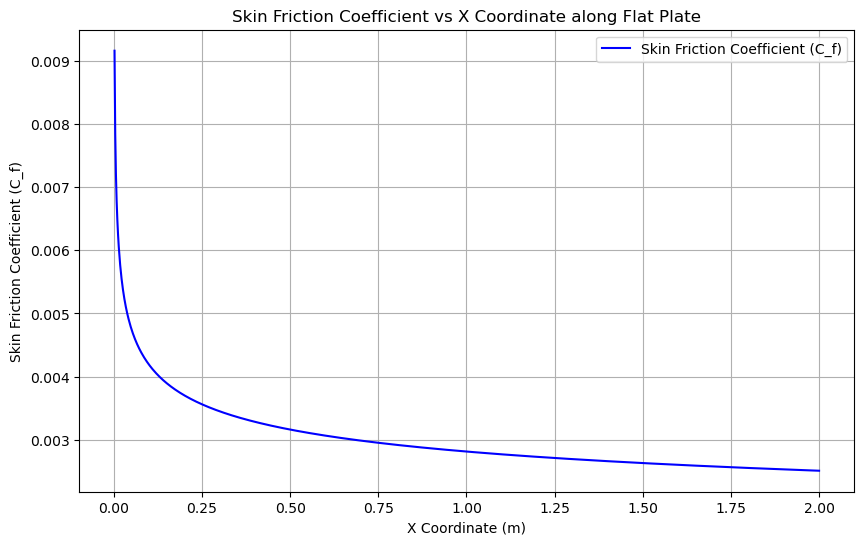

In [46]:
import matplotlib.pyplot as plt

# Plot skin friction coefficient vs x_coordinate
plt.figure(figsize=(10, 6))
plt.plot(data_grouped_skin_friction['x_coordinate'], data_grouped_skin_friction['skin_friction_coeff'], label='Skin Friction Coefficient (C_f)', color='b')
plt.xlabel('X Coordinate (m)')
plt.ylabel('Skin Friction Coefficient (C_f)')
plt.title('Skin Friction Coefficient vs X Coordinate along Flat Plate')
plt.legend()
plt.grid(True)
plt.show()


In [36]:
print(data_cleaned.columns)


Index(['skin_friction_LargeEddySim', 'x_coordinate', 'skin_friction_coeff',
       'five_percent_error', 'wall_shear_stress'],
      dtype='object')


In [38]:
# Define constants
rho = 1.225  # Density of air at sea level in kg/m^3
U_inf = 10  # Free-stream velocity in m/s

# Calculate wall shear stress (τ_w) from skin friction coefficient (cf)
data_cleaned['wall_shear_stress'] = data_cleaned['skin_friction_coeff'] * 0.5 * rho * U_inf**2

# Preview the updated data
print(data_cleaned.head())


   skin_friction_LargeEddySim  x_coordinate  skin_friction_coeff  \
3                    0.009383         0.002             0.009383   
4                    0.008168         0.004             0.008168   
5                    0.007532         0.006             0.007532   
6                    0.007111         0.008             0.007111   
7                    0.006800         0.010             0.006800   

   five_percent_error  wall_shear_stress  
3            0.000469           0.574682  
4            0.000408           0.500290  
5            0.000377           0.461322  
6            0.000356           0.435528  
7            0.000340           0.416518  


In [40]:
# Constants for air properties
mu = 1.81e-5  # Dynamic viscosity of air in kg/(m·s)

# Calculate energy dissipation rate (ε) from wall shear stress
data_cleaned['energy_dissipation_rate'] = (data_cleaned['wall_shear_stress']**2) / mu

# Preview the updated data with energy dissipation rate
print(data_cleaned[['x_coordinate', 'wall_shear_stress', 'energy_dissipation_rate']].head())


   x_coordinate  wall_shear_stress  energy_dissipation_rate
3         0.002           0.574682             18246.401947
4         0.004           0.500290             13828.181442
5         0.006           0.461322             11757.875659
6         0.008           0.435528             10479.810688
7         0.010           0.416518              9584.919695


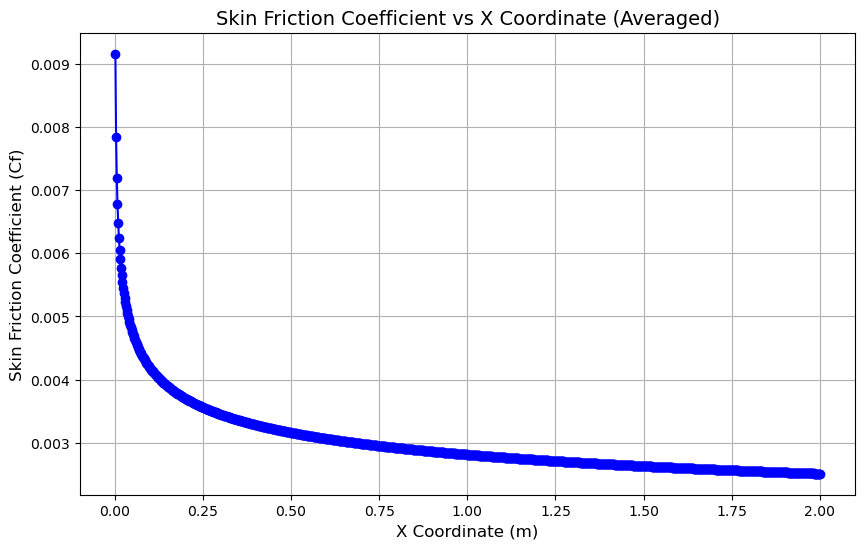

In [50]:
# Group by x-coordinate and calculate the mean skin_friction_coeff
aggregated_data = data_cleaned.groupby('x_coordinate').agg({
    'skin_friction_coeff': 'mean'
}).reset_index()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(aggregated_data['x_coordinate'], aggregated_data['skin_friction_coeff'], marker='o', linestyle='-', color='b')

# Add labels and title
plt.title('Skin Friction Coefficient vs X Coordinate (Averaged)', fontsize=14)
plt.xlabel('X Coordinate (m)', fontsize=12)
plt.ylabel('Skin Friction Coefficient (Cf)', fontsize=12)
plt.grid(True)

# Show the plot
plt.show()


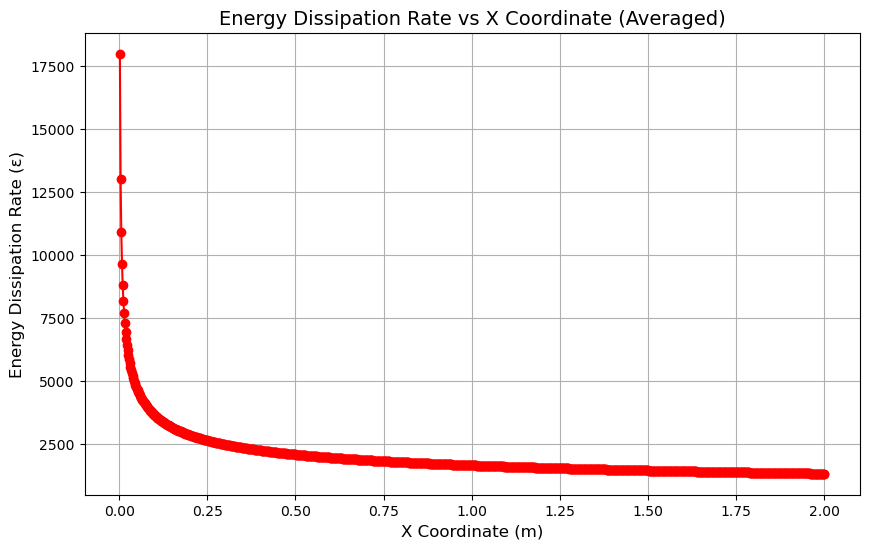

In [54]:
# Group by 'x_coordinate' and calculate the mean of 'energy_dissipation_rate'
data_grouped = data_cleaned.groupby('x_coordinate').agg({'energy_dissipation_rate': 'mean'}).reset_index()

# Plot the averaged energy dissipation rate vs x-coordinate
plt.figure(figsize=(10, 6))
plt.plot(data_grouped['x_coordinate'], data_grouped['energy_dissipation_rate'], marker='o', linestyle='-', color='r')

# Add labels and title
plt.title('Energy Dissipation Rate vs X Coordinate (Averaged)', fontsize=14)
plt.xlabel('X Coordinate (m)', fontsize=12)
plt.ylabel('Energy Dissipation Rate (ε)', fontsize=12)
plt.grid(True)

# Show the plot
plt.show()



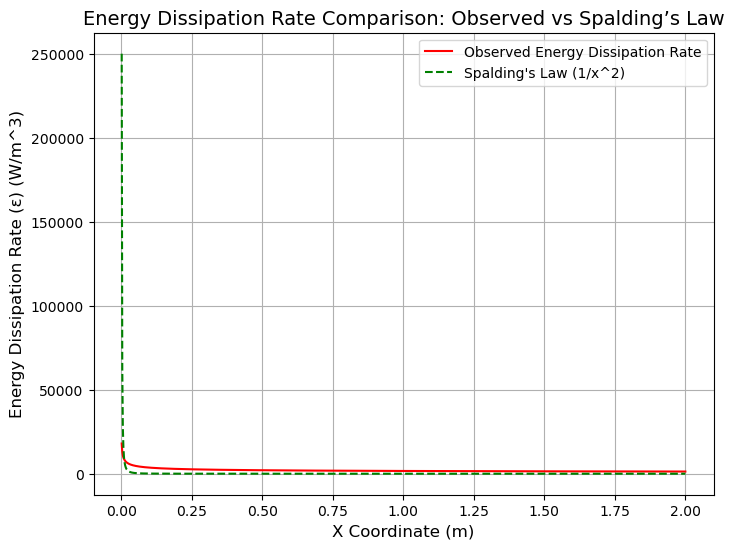

In [62]:
# Group the data by x-coordinate and calculate the mean energy dissipation rate
aggregated_data = data_cleaned.groupby('x_coordinate').agg({'energy_dissipation_rate': 'mean'}).reset_index()

# Now the aggregated data will have one unique value per x-coordinate

# Calculate the theoretical energy dissipation rate using Spalding's Law (1/x^2)
spalding_dissipation_rate = aggregated_data['x_coordinate']**(-2)

# Plot the observed energy dissipation rate vs Spalding's Law
plt.figure(figsize=(8,6))
plt.plot(aggregated_data['x_coordinate'], aggregated_data['energy_dissipation_rate'], label='Observed Energy Dissipation Rate', color='red')
plt.plot(aggregated_data['x_coordinate'], spalding_dissipation_rate, label="Spalding's Law (1/x^2)", color='green', linestyle='--')
plt.xlabel('X Coordinate (m)', fontsize=12)
plt.ylabel('Energy Dissipation Rate (ε) (W/m^3)', fontsize=12)
plt.title('Energy Dissipation Rate Comparison: Observed vs Spalding’s Law', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


In [66]:
print(data_cleaned.columns)  # List all columns in the dataset
print(data_cleaned.head())    # Preview the first few rows of data


Index(['skin_friction_LargeEddySim', 'x_coordinate', 'skin_friction_coeff',
       'five_percent_error', 'wall_shear_stress', 'energy_dissipation_rate'],
      dtype='object')
   skin_friction_LargeEddySim  x_coordinate  skin_friction_coeff  \
3                    0.009383         0.002             0.009383   
4                    0.008168         0.004             0.008168   
5                    0.007532         0.006             0.007532   
6                    0.007111         0.008             0.007111   
7                    0.006800         0.010             0.006800   

   five_percent_error  wall_shear_stress  energy_dissipation_rate  
3            0.000469           0.574682             18246.401947  
4            0.000408           0.500290             13828.181442  
5            0.000377           0.461322             11757.875659  
6            0.000356           0.435528             10479.810688  
7            0.000340           0.416518              9584.919695  


In [68]:
# Kinematic viscosity for air (at ~300K)
nu = 1.5e-5  # m^2/s

# Calculate Turbulent Kinetic Energy (TKE) from energy dissipation rate (ε)
data_cleaned['tke'] = data_cleaned['energy_dissipation_rate'] / nu

# Check the updated dataset with TKE
print(data_cleaned[['x_coordinate', 'energy_dissipation_rate', 'tke']].head())


   x_coordinate  energy_dissipation_rate           tke
3         0.002             18246.401947  1.216427e+09
4         0.004             13828.181442  9.218788e+08
5         0.006             11757.875659  7.838584e+08
6         0.008             10479.810688  6.986540e+08
7         0.010              9584.919695  6.389946e+08


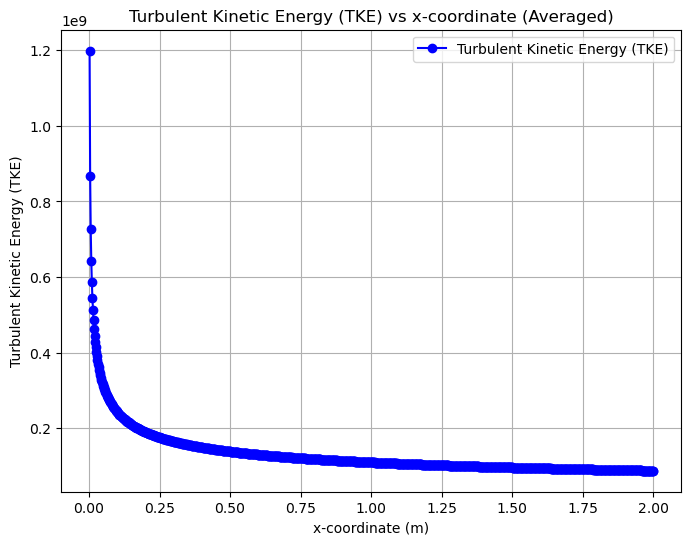

In [72]:
# Group by 'x_coordinate' and calculate the average for each group
data_grouped = data_cleaned.groupby('x_coordinate').mean()

# Plot the averaged TKE vs x-coordinate
plt.figure(figsize=(8, 6))
plt.plot(data_grouped.index, data_grouped['tke'], label='Turbulent Kinetic Energy (TKE)', color='b', marker='o')

# Labels and title
plt.xlabel('x-coordinate (m)')
plt.ylabel('Turbulent Kinetic Energy (TKE)')
plt.title('Turbulent Kinetic Energy (TKE) vs x-coordinate (Averaged)')

# Display grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


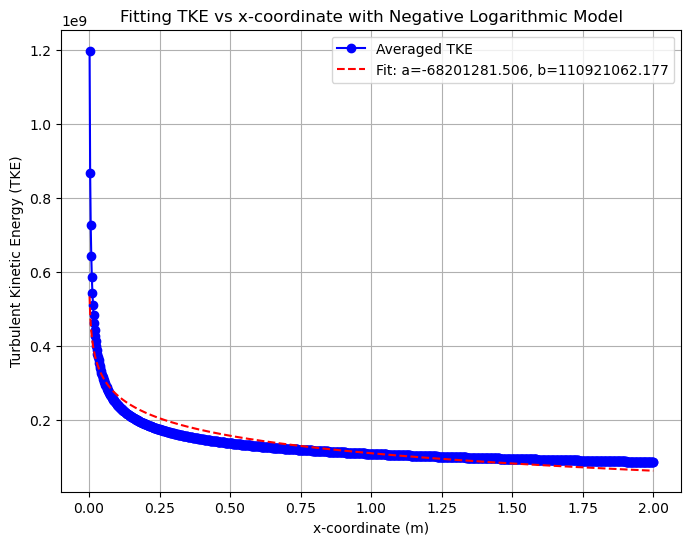

In [74]:
# Fit the data to a negative logarithmic model
from scipy.optimize import curve_fit
import numpy as np

# Define the negative logarithmic model
def negative_log_model(x, a, b):
    return a * np.log(x) + b

# Extract x (x-coordinate) and y (TKE) values
x_values = data_grouped.index
y_values = data_grouped['tke']

# Fit the model to the data
params, covariance = curve_fit(negative_log_model, x_values, y_values)

# Get the fitted parameters
a, b = params

# Plot the data and the fitted curve
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='Averaged TKE', color='b', marker='o')
plt.plot(x_values, negative_log_model(x_values, *params), 'r--', label=f'Fit: a={a:.3f}, b={b:.3f}')

# Labels and title
plt.xlabel('x-coordinate (m)')
plt.ylabel('Turbulent Kinetic Energy (TKE)')
plt.title('Fitting TKE vs x-coordinate with Negative Logarithmic Model')

# Display grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


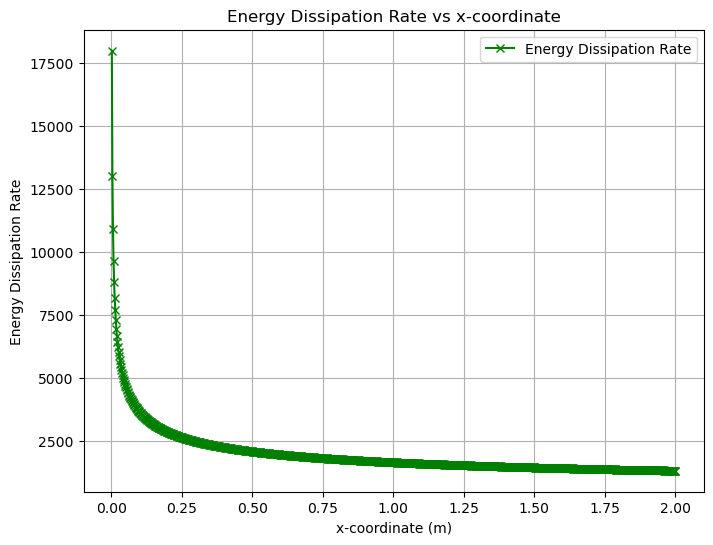

In [76]:
# Plot Energy Dissipation Rate vs x-coordinate
plt.figure(figsize=(8, 6))
plt.plot(data_grouped.index, data_grouped['energy_dissipation_rate'], label='Energy Dissipation Rate', color='g', marker='x')

# Labels and title
plt.xlabel('x-coordinate (m)')
plt.ylabel('Energy Dissipation Rate')
plt.title('Energy Dissipation Rate vs x-coordinate')

# Display grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


In [102]:
metadata = """ from https://www.grc.nasa.gov/www/wind/valid/fpturb/TKE.data
# Measured turbulence kinetic energy profiles as compiled by
#   Patel, Rodi, and Scheuerer AIAA Journal Vol. 23, No. 9, 1985.
#   Digitized from figure 4.
# This data represents an "average" t.k.e. profile for the data
# obtained by
#   D. Coles "A Model for Flow in the Viscous Sublayer,"
#     Proceedings of the Workshop on Coherent Structure of
#     Turbulent Boundary Layers, Lehigh Univ., Bethlehem PA 1978.
#   M.M.M.El Telbany & A.J.Reynolds "Turbulence in Plane Channel
#     Flows," Journal of Fluid Mechanics, Vol. 111, pp.283-318, 1981.
# eps+     = (Total Diss)
# Prod_Dis = Prod / (Total) Diss
# D+       = (Total Diss)+ - (Chien Diss)+
# Variables="y+","u+","k+","eps+","-uv+","Prod_Dis","D+"
# Zone T="Patel", F=POINT
"""

# The actual data (starting from the first numeric value)
data = """
2.6  0.0  0.31  0.0  0.0  0.0  0.0
5.3  0.0  1.23  0.0  0.0  0.0  0.0
7.7  0.0  2.80  0.0  0.0  0.0  0.0
9.9  0.0  4.07  0.0  0.0  0.0  0.0
12.4  0.0  4.46  0.0  0.0  0.0  0.0
14.9  0.0  4.48  0.0  0.0  0.0  0.0
17.4  0.0  4.47  0.0  0.0  0.0  0.0
19.9  0.0  4.42  0.0  0.0  0.0  0.0
22.2  0.0  4.37  0.0  0.0  0.0  0.0
24.9  0.0  4.31  0.0  0.0  0.0  0.0
27.6  0.0  4.25  0.0  0.0  0.0  0.0
29.9  0.0  4.16  0.0  0.0  0.0  0.0
32.3  0.0  4.07  0.0  0.0  0.0  0.0
34.9  0.0  3.99  0.0  0.0  0.0  0.0
37.3  0.0  3.90  0.0  0.0  0.0  0.0
39.8  0.0  3.81  0.0  0.0  0.0  0.0
42.4  0.0  3.73  0.0  0.0  0.0  0.0
44.8  0.0  3.62  0.0  0.0  0.0  0.0
47.2  0.0  3.53  0.0  0.0  0.0  0.0
49.7  0.0  3.46  0.0  0.0  0.0  0.0
52.2  0.0  3.40  0.0  0.0  0.0  0.0
54.8  0.0  3.36  0.0  0.0  0.0  0.0
57.4  0.0  3.31  0.0  0.0  0.0  0.0
59.6  0.0  3.32  0.0  0.0  0.0  0.0
62.2  0.0  3.32  0.0  0.0  0.0  0.0
64.6  0.0  3.30  0.0  0.0  0.0  0.0
67.0  0.0  3.29  0.0  0.0  0.0  0.0
69.7  0.0  3.29  0.0  0.0  0.0  0.0
72.2  0.0  3.29  0.0  0.0  0.0  0.0
74.8  0.0  3.29  0.0  0.0  0.0  0.0
77.3  0.0  3.29  0.0  0.0  0.0  0.0
79.8  0.0  3.29  0.0  0.0  0.0  0.0
82.3  0.0  3.30  0.0  0.0  0.0  0.0
84.8  0.0  3.30  0.0  0.0  0.0  0.0
87.3  0.0  3.32  0.0  0.0  0.0  0.0
89.7  0.0  3.31  0.0  0.0  0.0  0.0
92.4  0.0  3.31  0.0  0.0  0.0  0.0
94.6  0.0  3.31  0.0  0.0  0.0  0.0
97.4  0.0  3.30  0.0  0.0  0.0  0.0
99.9  0.0  3.28  0.0  0.0  0.0  0.0
"""

print("\nData:")
print(data[:500])  # printing the first part of the data to inspect
# Variables="y+","u+","k+","eps+","-uv+","Prod_Dis","D+"



Data:

2.6  0.0  0.31  0.0  0.0  0.0  0.0
5.3  0.0  1.23  0.0  0.0  0.0  0.0
7.7  0.0  2.80  0.0  0.0  0.0  0.0
9.9  0.0  4.07  0.0  0.0  0.0  0.0
12.4  0.0  4.46  0.0  0.0  0.0  0.0
14.9  0.0  4.48  0.0  0.0  0.0  0.0
17.4  0.0  4.47  0.0  0.0  0.0  0.0
19.9  0.0  4.42  0.0  0.0  0.0  0.0
22.2  0.0  4.37  0.0  0.0  0.0  0.0
24.9  0.0  4.31  0.0  0.0  0.0  0.0
27.6  0.0  4.25  0.0  0.0  0.0  0.0
29.9  0.0  4.16  0.0  0.0  0.0  0.0
32.3  0.0  4.07  0.0  0.0  0.0  0.0
34.9  0.0  3.99  0.0  0.0  0.0  0.0


In [106]:
from io import StringIO

# Data string (using your data)
data_str = """
2.6  0.0  0.31  0.0  0.0  0.0  0.0
5.3  0.0  1.23  0.0  0.0  0.0  0.0
7.7  0.0  2.80  0.0  0.0  0.0  0.0
9.9  0.0  4.07  0.0  0.0  0.0  0.0
12.4  0.0  4.46  0.0  0.0  0.0  0.0
14.9  0.0  4.48  0.0  0.0  0.0  0.0
17.4  0.0  4.47  0.0  0.0  0.0  0.0
19.9  0.0  4.42  0.0  0.0  0.0  0.0
22.2  0.0  4.37  0.0  0.0  0.0  0.0
24.9  0.0  4.31  0.0  0.0  0.0  0.0
27.6  0.0  4.25  0.0  0.0  0.0  0.0
29.9  0.0  4.16  0.0  0.0  0.0  0.0
32.3  0.0  4.07  0.0  0.0  0.0  0.0
34.9  0.0  3.99  0.0  0.0  0.0  0.0
37.3  0.0  3.90  0.0  0.0  0.0  0.0
39.8  0.0  3.81  0.0  0.0  0.0  0.0
42.4  0.0  3.73  0.0  0.0  0.0  0.0
44.8  0.0  3.62  0.0  0.0  0.0  0.0
47.2  0.0  3.53  0.0  0.0  0.0  0.0
49.7  0.0  3.46  0.0  0.0  0.0  0.0
52.2  0.0  3.40  0.0  0.0  0.0  0.0
54.8  0.0  3.36  0.0  0.0  0.0  0.0
57.4  0.0  3.31  0.0  0.0  0.0  0.0
59.6  0.0  3.32  0.0  0.0  0.0  0.0
62.2  0.0  3.32  0.0  0.0  0.0  0.0
64.6  0.0  3.30  0.0  0.0  0.0  0.0
67.0  0.0  3.29  0.0  0.0  0.0  0.0
69.7  0.0  3.29  0.0  0.0  0.0  0.0
72.2  0.0  3.29  0.0  0.0  0.0  0.0
74.8  0.0  3.29  0.0  0.0  0.0  0.0
77.3  0.0  3.29  0.0  0.0  0.0  0.0
79.8  0.0  3.29  0.0  0.0  0.0  0.0
82.3  0.0  3.30  0.0  0.0  0.0  0.0
84.8  0.0  3.30  0.0  0.0  0.0  0.0
87.3  0.0  3.32  0.0  0.0  0.0  0.0
89.7  0.0  3.31  0.0  0.0  0.0  0.0
92.4  0.0  3.31  0.0  0.0  0.0  0.0
94.6  0.0  3.31  0.0  0.0  0.0  0.0
97.4  0.0  3.30  0.0  0.0  0.0  0.0
99.9  0.0  3.28  0.0  0.0  0.0  0.0
"""

# Use pandas to read the data into a DataFrame
data_io = StringIO(data_str)

# Define the column names
columns = ["y+", "u+", "k+", "eps+", "-uv+", "Prod_Dis", "D+"]

# Read the data into a DataFrame using regex to handle multiple spaces
df = pd.read_csv(data_io, sep=r'\s+', header=None, names=columns)

# Show the first few rows to check if everything looks good
print(df.head())

     y+   u+    k+  eps+  -uv+  Prod_Dis   D+
0   2.6  0.0  0.31   0.0   0.0       0.0  0.0
1   5.3  0.0  1.23   0.0   0.0       0.0  0.0
2   7.7  0.0  2.80   0.0   0.0       0.0  0.0
3   9.9  0.0  4.07   0.0   0.0       0.0  0.0
4  12.4  0.0  4.46   0.0   0.0       0.0  0.0


In [108]:
# Split the data into lines
lines = data.strip().split("\n")

# Process each line into a list of values (splitting by whitespace)
parsed_data = [line.split() for line in lines]

# Convert to DataFrame
df = pd.DataFrame(parsed_data, columns=["y+", "u+", "k+", "eps+", "-uv+", "Prod_Dis", "D+"])

# Convert the columns to appropriate types
df = df.astype({"y+": float, "u+": float, "k+": float, "eps+": float, "-uv+": float, "Prod_Dis": float, "D+": float})

# Display the DataFrame
print(df.head())



     y+   u+    k+  eps+  -uv+  Prod_Dis   D+
0   2.6  0.0  0.31   0.0   0.0       0.0  0.0
1   5.3  0.0  1.23   0.0   0.0       0.0  0.0
2   7.7  0.0  2.80   0.0   0.0       0.0  0.0
3   9.9  0.0  4.07   0.0   0.0       0.0  0.0
4  12.4  0.0  4.46   0.0   0.0       0.0  0.0


In [110]:
# Split the data into lines
lines = data.strip().split("\n")

# Inspect the first few lines to count the number of columns
for line in lines[:5]:
    print(line.split())  # Split each line by space and print the number of columns

# After inspecting, I noticed that each row has 7 values. Now, let's proceed to convert to DataFrame.
parsed_data = [line.split() for line in lines]

# Convert to a DataFrame
df = pd.DataFrame(parsed_data, columns=["y+", "u+", "k+", "eps+", "-uv+", "Prod_Dis", "D+"])

# Convert columns to appropriate types
df = df.astype({"y+": float, "u+": float, "k+": float, "eps+": float, "-uv+": float, "Prod_Dis": float, "D+": float})

# Display the DataFrame
print(df.head())

['2.6', '0.0', '0.31', '0.0', '0.0', '0.0', '0.0']
['5.3', '0.0', '1.23', '0.0', '0.0', '0.0', '0.0']
['7.7', '0.0', '2.80', '0.0', '0.0', '0.0', '0.0']
['9.9', '0.0', '4.07', '0.0', '0.0', '0.0', '0.0']
['12.4', '0.0', '4.46', '0.0', '0.0', '0.0', '0.0']
     y+   u+    k+  eps+  -uv+  Prod_Dis   D+
0   2.6  0.0  0.31   0.0   0.0       0.0  0.0
1   5.3  0.0  1.23   0.0   0.0       0.0  0.0
2   7.7  0.0  2.80   0.0   0.0       0.0  0.0
3   9.9  0.0  4.07   0.0   0.0       0.0  0.0
4  12.4  0.0  4.46   0.0   0.0       0.0  0.0


In [118]:
print("Min k+:", df["k+"].min())
print("Max k+:", df["k+"].max())


Min k+: 0.31
Max k+: 4.48


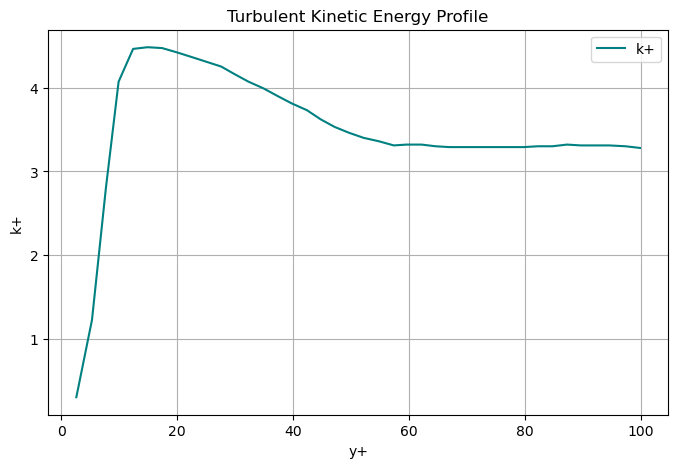

In [120]:
plt.figure(figsize=(8, 5))
plt.plot(df['y+'], df['k+'], label='k+', color='teal')
plt.xlabel('y+')
plt.ylabel('k+')
plt.title('Turbulent Kinetic Energy Profile')
plt.grid(True)
plt.legend()
plt.show()


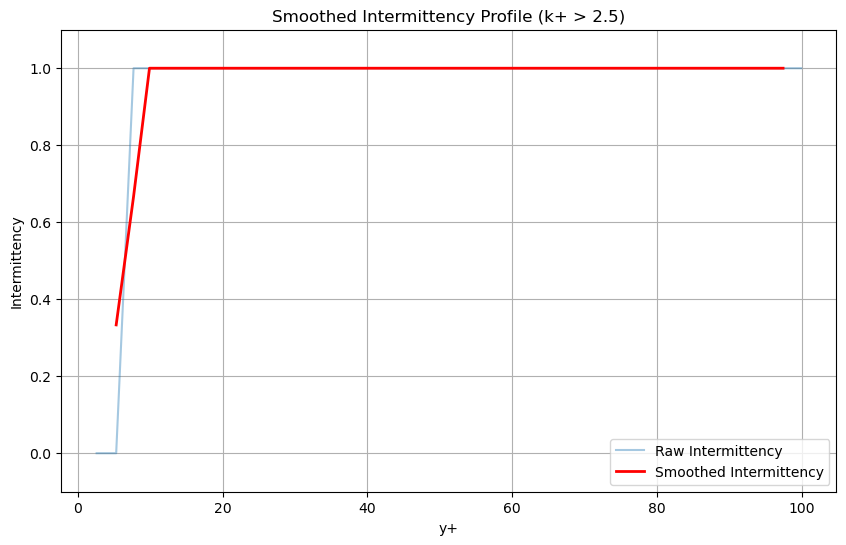

In [124]:
# Rolling average to clean up noise
df['intermittency'] = (df['k+'] > 2.5).astype(float)
df['intermittency_smooth'] = df['intermittency'].rolling(window=3, center=True).mean()

# Plot it
plt.figure(figsize=(10, 6))
plt.plot(df['y+'], df['intermittency'], alpha=0.4, label='Raw Intermittency')
plt.plot(df['y+'], df['intermittency_smooth'], color='red', label='Smoothed Intermittency', linewidth=2)
plt.xlabel('y+')
plt.ylabel('Intermittency')
plt.title('Smoothed Intermittency Profile (k+ > 2.5)')
plt.ylim(-0.1, 1.1)
plt.grid(True)
plt.legend()
plt.show()



In [126]:
# Threshold to detect transition point
transition_index = df[df['intermittency_smooth'] < 0.5].index.min()

# Estimate boundary layer thickness δ⁺
delta_plus = df.loc[transition_index, 'y+']
print(f"Estimated boundary layer thickness (δ⁺): {delta_plus:.2f}")


Estimated boundary layer thickness (δ⁺): 5.30


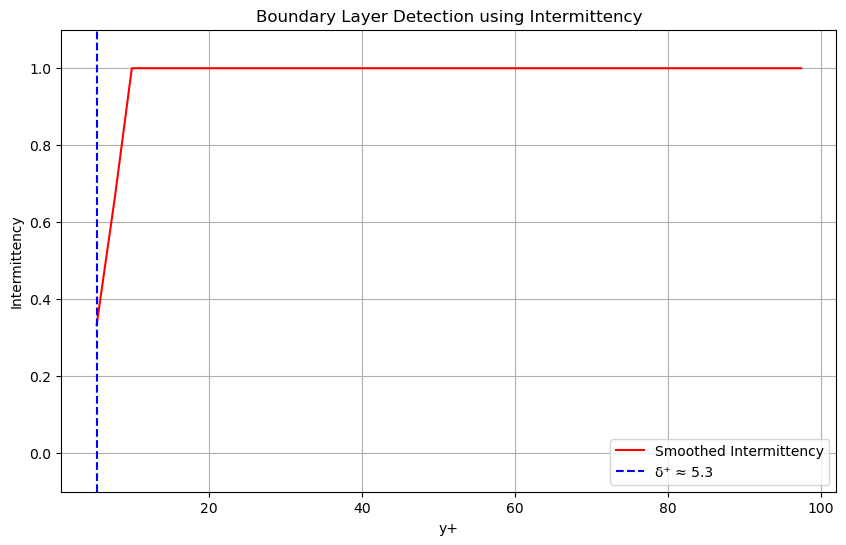

In [128]:
plt.figure(figsize=(10, 6))
plt.plot(df['y+'], df['intermittency_smooth'], color='red', label='Smoothed Intermittency')
plt.axvline(delta_plus, color='blue', linestyle='--', label=f'δ⁺ ≈ {delta_plus:.1f}')
plt.xlabel('y+')
plt.ylabel('Intermittency')
plt.title('Boundary Layer Detection using Intermittency')
plt.ylim(-0.1, 1.1)
plt.grid(True)
plt.legend()
plt.show()


Estimated boundary layer thickness (δ⁺): 5.30


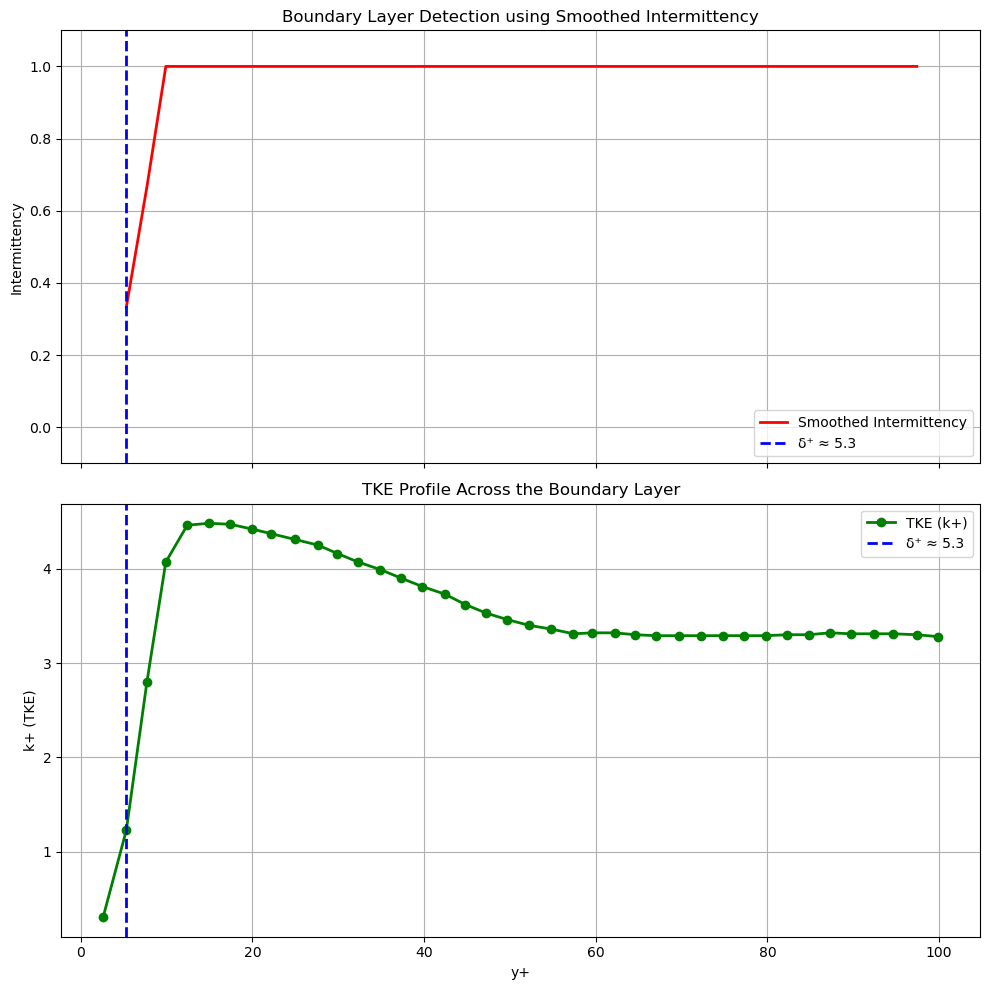

In [130]:

# df = DataFrame with columns ["y+", "u+", "k+", "eps+", "-uv+", "Prod_Dis", "D+"]
# and intermittency and smoothed intermittency have been computed, for example:
TKE_THRESHOLD = 2.5  # chosen based on prior analysis (adjust as needed)
df = df.sort_values("y+")

# Compute raw intermittency based on threshold for k+
df['intermittency'] = (df['k+'] > TKE_THRESHOLD).astype(float)

# Apply a rolling average to smooth the intermittency curve (window size can be adjusted)
window_size = 3
df['intermittency_smooth'] = df['intermittency'].rolling(window=window_size, center=True).mean()

# --- Step 1: Detect the boundary layer edge (δ⁺)
# We'll define δ⁺ as the first y+ where the smoothed intermittency drops below 0.5.
transition_index = df[df['intermittency_smooth'] < 0.5].index.min()
delta_plus = df.loc[transition_index, "y+"]
print(f"Estimated boundary layer thickness (δ⁺): {delta_plus:.2f}")

# --- Step 2: Create subplots to compare intermittency and TKE profiles.

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# Top subplot: Smoothed intermittency profile
ax1.plot(df["y+"], df["intermittency_smooth"], color="red", lw=2, label="Smoothed Intermittency")
ax1.axvline(delta_plus, color="blue", linestyle="--", lw=2, label=f"δ⁺ ≈ {delta_plus:.1f}")
ax1.set_ylabel("Intermittency")
ax1.set_title("Boundary Layer Detection using Smoothed Intermittency")
ax1.set_ylim(-0.1, 1.1)
ax1.grid(True)
ax1.legend()

# Bottom subplot: TKE (k+) Profile
ax2.plot(df["y+"], df["k+"], color="green", lw=2, marker="o", label="TKE (k+)")
ax2.axvline(delta_plus, color="blue", linestyle="--", lw=2, label=f"δ⁺ ≈ {delta_plus:.1f}")
ax2.set_xlabel("y+")
ax2.set_ylabel("k+ (TKE)")
ax2.set_title("TKE Profile Across the Boundary Layer")
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()


In [144]:
# Python part: list the contents of the extracted folder
import os

folder_path = '/Users/cicisofia/Downloads/NewDataCase1'
files = os.listdir(folder_path)
print("Extracted files:")
print(files)




Extracted files:
['HW2', 'README', 'PIV2', 'LDV2', 'PIV2additional']


In [150]:

piv2_path = '/Users/cicisofia/Downloads/NewDataCase1/PIV2'
piv2_files = os.listdir(piv2_path)

print("Files inside PIV2:")
for file in piv2_files:
    print(file)



Files inside PIV2:
005.dat
165.dat
170.dat
010.dat
210.dat
205.dat
215.dat
200.dat
Pressure.dat
000.dat
160.dat
175.dat
015.dat
270.dat
310.dat
305.dat
265.dat
065.dat
105.dat
110.dat
070.dat
060.dat
100.dat
115.dat
075.dat
275.dat
315.dat
300.dat
260.dat
README
090.dat
245.dat
Voltage.dat
325.dat
330.dat
250.dat
085.dat
050.dat
285.dat
130.dat
125.dat
290.dat
045.dat
055.dat
280.dat
135.dat
120.dat
PIV_new_mean.dat
295.dat
040.dat
095.dat
240.dat
320.dat
335.dat
255.dat
080.dat
030.dat
150.dat
145.dat
025.dat
225.dat
345.dat
190.dat
185.dat
350.dat
Displacement.dat
230.dat
220.dat
340.dat
195.dat
180.dat
355.dat
235.dat
035.dat
155.dat
140.dat
020.dat


In [162]:

# Load the raw data, skipping header
file_path = '/Users/cicisofia/Downloads/NewDataCase1/PIV2/PIV_new_mean.dat'
raw_data = pd.read_csv(file_path, skiprows=8, delim_whitespace=True, header=None, engine='python')
raw_flat = raw_data.values.flatten()
raw_flat = raw_flat[~np.isnan(raw_flat)]

# Reshape into 4 columns: u_mean, v_mean, u_rms, v_rms
nx, ny = 67, 84
n_points = nx * ny

u_mean   = raw_flat[0:n_points]
v_mean   = raw_flat[n_points:2*n_points]
u_rms    = raw_flat[2*n_points:3*n_points]
v_rms    = raw_flat[3*n_points:4*n_points]

# Generate x/y meshgrid
x_vals = np.linspace(0, 1, nx)
y_vals = np.linspace(0, 1, ny)
xx, yy = np.meshgrid(x_vals, y_vals)
x_flat = xx.flatten()
y_flat = yy.flatten()

# Build final labeled DataFrame
df_piv = pd.DataFrame({
    'x': x_flat,
    'y': y_flat,
    'u_mean': u_mean,
    'v_mean': v_mean,
    'u_rms': u_rms,
    'v_rms': v_rms
})

# Check it out
print(df_piv.head())
print(f"Shape: {df_piv.shape}")





          x    y    u_mean    v_mean     u_rms     v_rms
0  0.000000  0.0 -3.164014  8.734257  0.743180  0.388122
1  0.015152  0.0 -3.062284  8.734257  0.744407  0.448860
2  0.030303  0.0 -2.953287  8.734257  0.739713  0.530956
3  0.045455  0.0 -2.851557  8.734257  0.730392  0.621758
4  0.060606  0.0 -2.757093  8.734257  0.721803  0.716799
Shape: (5628, 6)


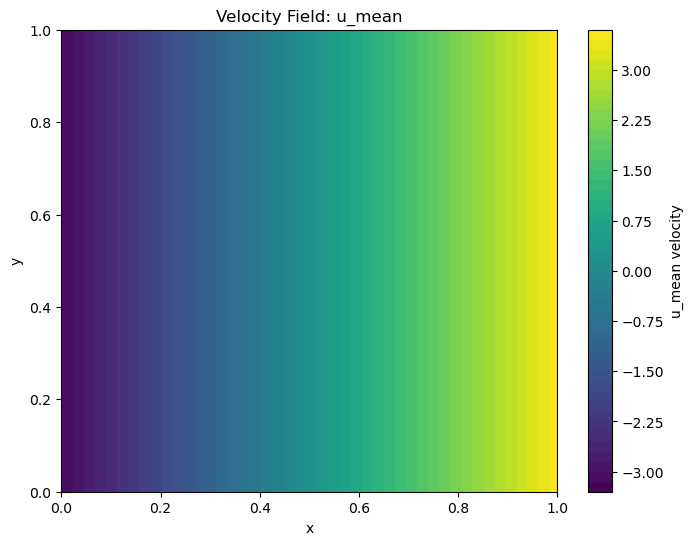

In [166]:

plt.figure(figsize=(8, 6))
plt.tricontourf(df_piv['x'], df_piv['y'], df_piv['u_mean'], levels=50)
plt.colorbar(label='u_mean velocity')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Velocity Field: u_mean')
plt.show()



In [182]:

df_cf=data_cleaned
# Let's assume the Cf x values are in meters (0.002 to 0.01)
# And PIV values are normalized from 0 to 1, representing the same 0–0.012m span
df_piv['x_m'] = df_piv['x'] * 0.012  # now in meters
df_cf = df_cf.sort_values(by='x_coordinate')
df_piv = df_piv.sort_values(by='x_m')

merged = pd.merge_asof(df_cf, df_piv, left_on='x_coordinate', right_on='x_m', direction='nearest')

print(merged.head())
print(f"Merged shape: {merged.shape}")


   skin_friction_LargeEddySim  x_coordinate  skin_friction_coeff  \
0                    0.009383         0.002             0.009383   
1                    0.006975         0.002             0.006975   
2                    0.011119         0.002             0.011119   
3                    0.008168         0.004             0.008168   
4                    0.006317         0.004             0.006317   

   five_percent_error  wall_shear_stress  energy_dissipation_rate  \
0            0.000469           0.574682             18246.401947   
1            0.000349           0.427208             10083.257659   
2            0.000556           0.681045             25625.531589   
3            0.000408           0.500290             13828.181442   
4            0.000316           0.386932              8271.604092   

            tke         x         y    u_mean    v_mean     u_rms     v_rms  \
0  1.216427e+09  0.166667  0.373494 -2.037716  5.587890  0.370516  0.521215   
1  6.722172e+08  0

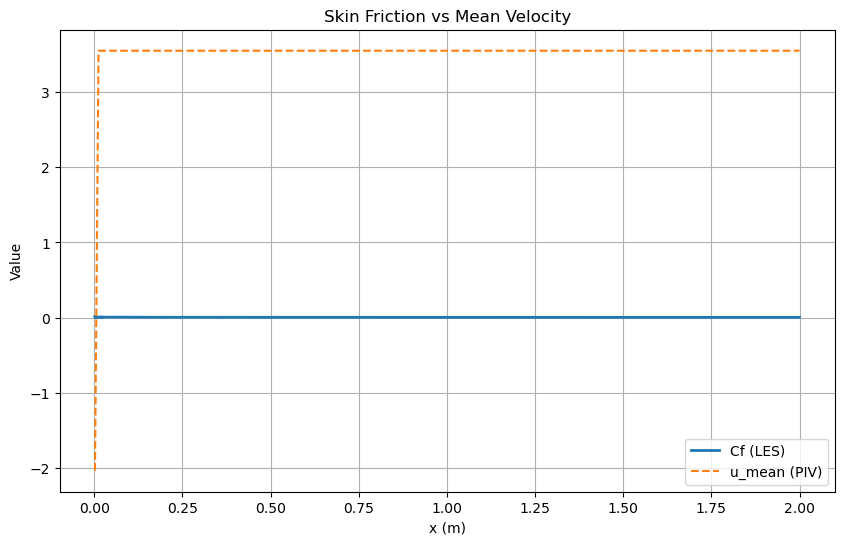

In [184]:

plt.figure(figsize=(10, 6))
plt.plot(merged['x_coordinate'], merged['skin_friction_coeff'], label='Cf (LES)', linewidth=2)
plt.plot(merged['x_coordinate'], merged['u_mean'], label='u_mean (PIV)', linestyle='--')
plt.xlabel('x (m)')
plt.ylabel('Value')
plt.title('Skin Friction vs Mean Velocity')
plt.legend()
plt.grid(True)
plt.show()


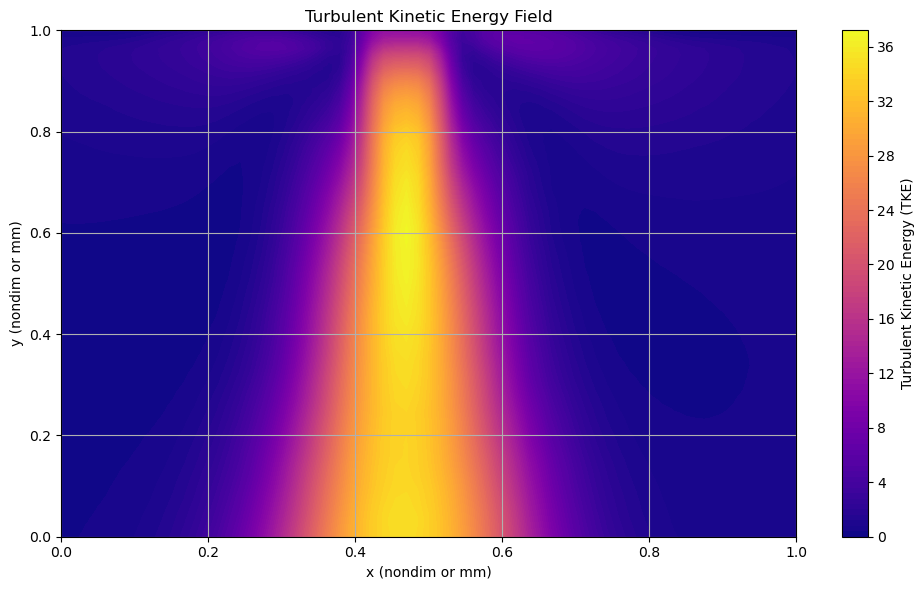

In [170]:
df_piv['TKE'] = 0.5 * (df_piv['u_rms']**2 + df_piv['v_rms']**2)

import matplotlib.tri as tri

plt.figure(figsize=(10, 6))

# Create triangulation (for scattered x, y data)
triang = tri.Triangulation(df_piv['x'], df_piv['y'])

# Contour plot of TKE
plt.tricontourf(triang, df_piv['TKE'], levels=100, cmap='plasma')

plt.colorbar(label='Turbulent Kinetic Energy (TKE)')
plt.title('Turbulent Kinetic Energy Field')
plt.xlabel('x (nondim or mm)')
plt.ylabel('y (nondim or mm)')
plt.grid(True)
plt.tight_layout()
plt.show()


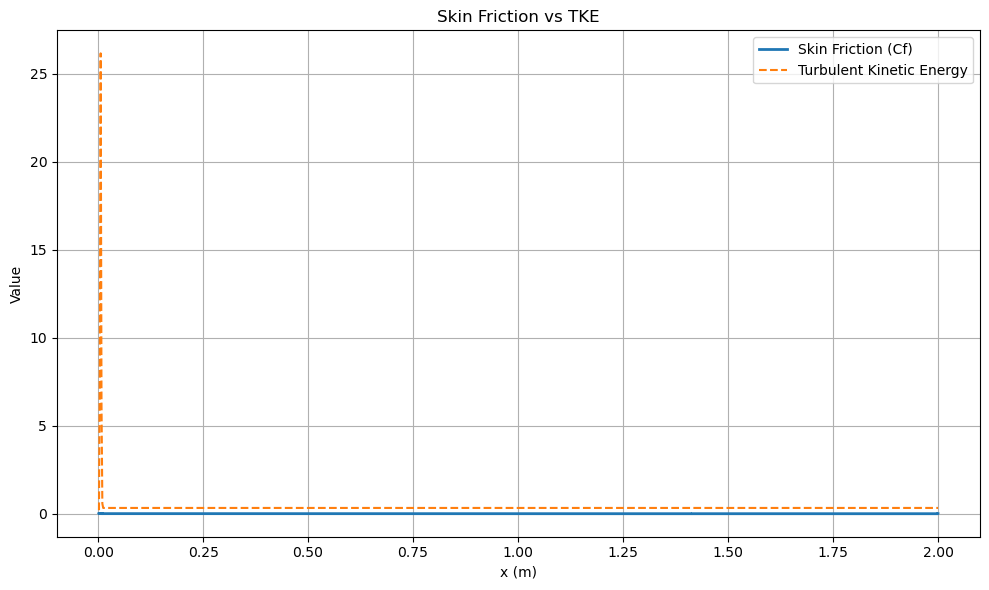

In [186]:

plt.figure(figsize=(10, 6))
plt.plot(merged['x_coordinate'], merged['skin_friction_coeff'], label='Skin Friction (Cf)', linewidth=2)
plt.plot(merged['x_coordinate'], merged['TKE'], label='Turbulent Kinetic Energy', linestyle='--')
plt.xlabel('x (m)')
plt.ylabel('Value')
plt.title('Skin Friction vs TKE')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
